In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


2025-09-11 10:32:43.924006: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-11 10:32:45.996261: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-11 10:32:50.820846: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


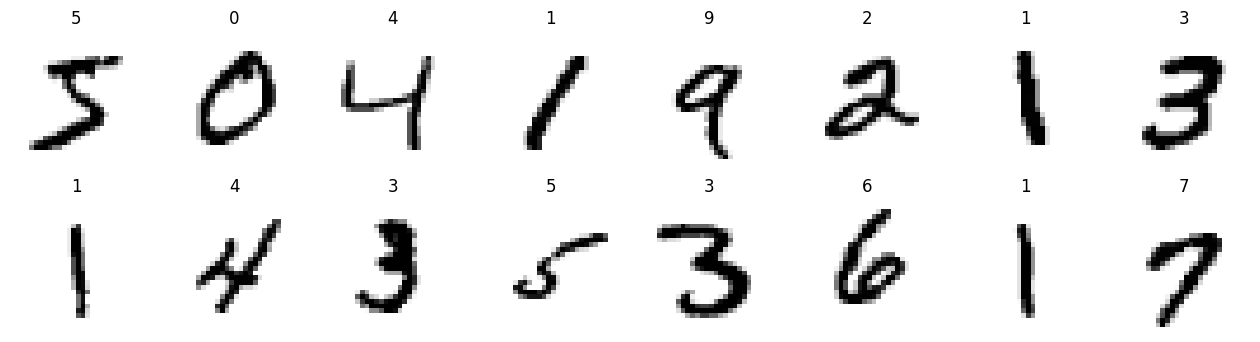

In [5]:
linhas  = 2
colunas = 8

fig, axs = plt.subplots(linhas, colunas, figsize=(16, 4))
axs      = axs.flatten()

for i in range(linhas * colunas):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
modelo_1 = tf.keras.models.Sequential()
modelo_1.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
modelo_1.add(tf.keras.layers.Dense(10, activation='softmax'))

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-11 10:34:11.987165: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
modelo_1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history_m1 = modelo_1.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64)

Epoch 1/10


/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7697 - loss: 0.9820 - val_accuracy: 0.8569 - val_loss: 0.6093
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8630 - loss: 0.5558 - val_accuracy: 0.8776 - val_loss: 0.4822
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8766 - loss: 0.4751 - val_accuracy: 0.8875 - val_loss: 0.4311
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.4357 - val_accuracy: 0.8932 - val_loss: 0.4018
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8888 - loss: 0.4112 - val_accuracy: 0.8975 - val_loss: 0.3821
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8929 - loss: 0.3941 - val_accuracy: 0.9006 - val_loss: 0.3683
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8956 - loss: 0.3813 - val_accuracy: 0.9033 - val_loss: 0.3579
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8982 - loss: 0.3711 - val_accuracy: 0.9052 - val_

In [10]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')

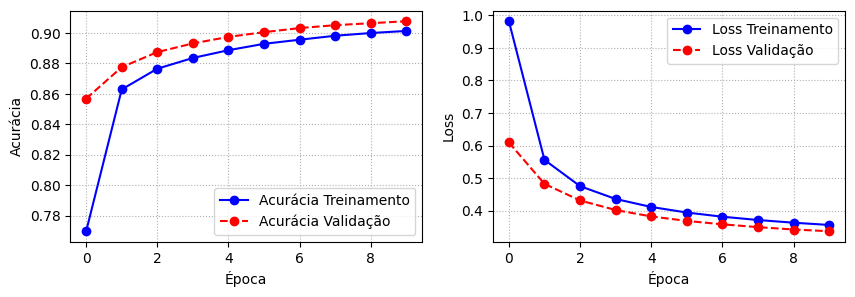

In [11]:
plot_resultados_modelo(history_m1)

In [12]:
modelo_2 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history_m2 = modelo_2.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test), batch_size=64,
                          verbose=2)

Epoch 1/10
938/938 - 2s - 2ms/step - accuracy: 0.2652 - loss: 2.2534 - val_accuracy: 0.4949 - val_loss: 2.1820
Epoch 2/10
938/938 - 2s - 2ms/step - accuracy: 0.5094 - loss: 2.0891 - val_accuracy: 0.5578 - val_loss: 1.9593
Epoch 3/10
938/938 - 2s - 2ms/step - accuracy: 0.6044 - loss: 1.7926 - val_accuracy: 0.6651 - val_loss: 1.5887
Epoch 4/10
938/938 - 2s - 2ms/step - accuracy: 0.6870 - loss: 1.4140 - val_accuracy: 0.7300 - val_loss: 1.2280
Epoch 5/10
938/938 - 2s - 2ms/step - accuracy: 0.7483 - loss: 1.1086 - val_accuracy: 0.7733 - val_loss: 0.9801
Epoch 6/10
938/938 - 2s - 2ms/step - accuracy: 0.7864 - loss: 0.9081 - val_accuracy: 0.8088 - val_loss: 0.8200
Epoch 7/10
938/938 - 2s - 2ms/step - accuracy: 0.8127 - loss: 0.7764 - val_accuracy: 0.8288 - val_loss: 0.7114
Epoch 8/10
938/938 - 2s - 2ms/step - accuracy: 0.8309 - loss: 0.6851 - val_accuracy: 0.8420 - val_loss: 0.6344
Epoch 9/10
938/938 - 2s - 2ms/step - accuracy: 0.8440 - loss: 0.6186 - val_accuracy: 0.8502 - val_loss: 0.5768
E

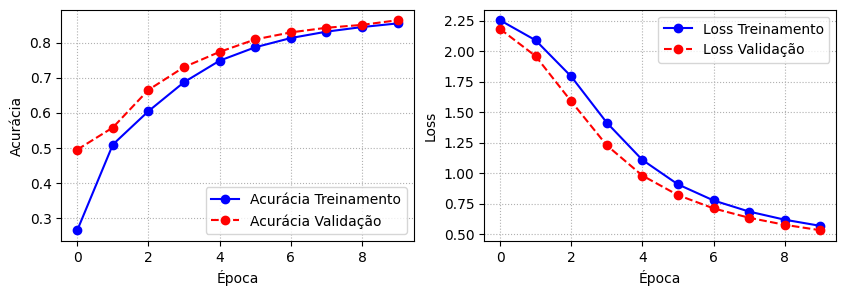

In [14]:
plot_resultados_modelo(history_m2)

In [15]:
modelo_3 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
history_m3 = modelo_3.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64, verbose=2)

Epoch 1/10
938/938 - 3s - 3ms/step - accuracy: 0.9261 - loss: 0.2555 - val_accuracy: 0.9643 - val_loss: 0.1198
Epoch 2/10
938/938 - 2s - 2ms/step - accuracy: 0.9686 - loss: 0.1046 - val_accuracy: 0.9722 - val_loss: 0.0880
Epoch 3/10
938/938 - 2s - 2ms/step - accuracy: 0.9789 - loss: 0.0694 - val_accuracy: 0.9755 - val_loss: 0.0773
Epoch 4/10
938/938 - 2s - 2ms/step - accuracy: 0.9841 - loss: 0.0500 - val_accuracy: 0.9777 - val_loss: 0.0698
Epoch 5/10
938/938 - 2s - 2ms/step - accuracy: 0.9876 - loss: 0.0388 - val_accuracy: 0.9788 - val_loss: 0.0734
Epoch 6/10
938/938 - 2s - 2ms/step - accuracy: 0.9893 - loss: 0.0320 - val_accuracy: 0.9786 - val_loss: 0.0745
Epoch 7/10
938/938 - 2s - 2ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9732 - val_loss: 0.0920
Epoch 8/10
938/938 - 2s - 2ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9807 - val_loss: 0.0717
Epoch 9/10
938/938 - 2s - 2ms/step - accuracy: 0.9941 - loss: 0.0171 - val_accuracy: 0.9775 - val_loss: 0.0826
E

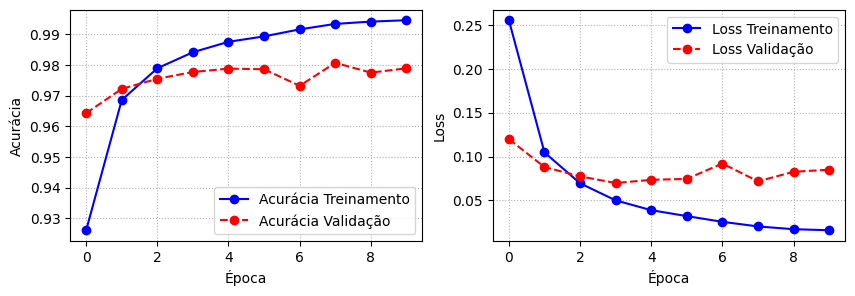

In [17]:
plot_resultados_modelo(history_m3)

In [18]:
import math
modelo_4 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [19]:
history_m4 = modelo_4.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 19s - 20ms/step - accuracy: 0.9578 - loss: 0.1434 - val_accuracy: 0.9755 - val_loss: 0.0792 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 16s - 17ms/step - accuracy: 0.9842 - loss: 0.0536 - val_accuracy: 0.9827 - val_loss: 0.0616 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 16s - 17ms/step - accuracy: 0.9917 - loss: 0.0283 - val_accuracy: 0.9894 - val_loss: 0.0348 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 16s - 17ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9900 - val_loss: 0.0377 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 16s - 17ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accurac

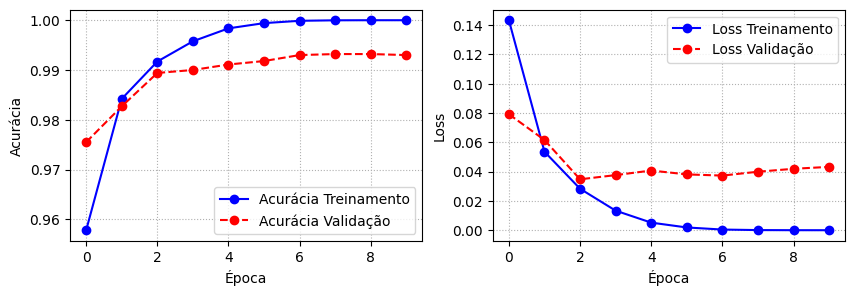

In [20]:
plot_resultados_modelo(history_m4)

In [21]:
modelo_5 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [22]:
history_m5 = modelo_5.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 17s - 19ms/step - accuracy: 0.9419 - loss: 0.1979 - val_accuracy: 0.9677 - val_loss: 0.1233 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 17s - 18ms/step - accuracy: 0.9754 - loss: 0.0893 - val_accuracy: 0.9849 - val_loss: 0.0538 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 17s - 18ms/step - accuracy: 0.9850 - loss: 0.0518 - val_accuracy: 0.9854 - val_loss: 0.0453 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 16s - 17ms/step - accuracy: 0.9907 - loss: 0.0322 - val_accuracy: 0.9883 - val_loss: 0.0413 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 16s - 17ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accurac

In [25]:
modelo_6 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28, 28, 1)),

      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [26]:
history_m6 = modelo_6.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 25s - 27ms/step - accuracy: 0.9640 - loss: 0.1174 - val_accuracy: 0.9853 - val_loss: 0.0453 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 24s - 25ms/step - accuracy: 0.9858 - loss: 0.0477 - val_accuracy: 0.9912 - val_loss: 0.0274 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 23s - 24ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9914 - val_loss: 0.0248 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 22s - 23ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9915 - val_loss: 0.0268 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 21s - 23ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accurac

In [ ]:
plot_resultados_modelo(history_m5)

### CIFAR
 Ele contém 60.000 imagens coloridas, com tamanho de 32x32 pixels distribuídas em 10 classes diferentes, totalizando 6.000 imagens por classe.
 As dimensões das imagens são diferentes e agora possuem 3 canais de cores, portanto as entradas dos modelos vão precisar serem ajustadas.

In [27]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
